# Basic visualisation of preprocessed data sets

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import math

In [3]:
import brsflufight_nerc2  as bff2

## Load data

Well that's easy ;-)

In [4]:
data_sets = bff2.load_data_files()

bff2.summarise_data(data_sets)

historical_GHG_Sectors_GCP
--------------------------------------
Index(['Bunkers (CO2)', 'Cement (CO2)', 'Coal (CO2)', 'Gas (CO2)',
       'Gas flaring (CO2)', 'Oil (CO2)',
       'Total fossil fuels and cement (CO2)'],
      dtype='object')
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11502 entries, ('Afghanistan', Timestamp('1960-01-01 00:00:00')) to ('Zimbabwe', Timestamp('2018-01-01 00:00:00'))
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Country                              11502 non-null  object        
 1   date                                 11502 non-null  datetime64[ns]
 2   Data source                          11502 non-null  object        
 3   Unit                                 11502 non-null  object        
 4   Bunkers (CO2)                        59 non-null     float64       
 5   Ceme

## Visualising mobility

### Google

The `DataSet` class offers simplification of the access to the data notably to identify the name of the country in the data. 

In [5]:
data_sets['mobility_google'].get_country_string('United Kingdom')

'GB_United Kingdom'

Direct access to the data is provided as follows:

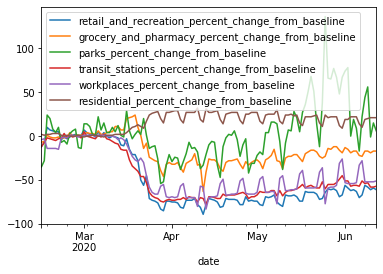

In [6]:
data_sets['mobility_google'].get_country_data('United Kingdom').plot()

Under the hood this does

```python
data_sets[
    'mobility_google'  # pick a data set
].loc[
    'GB_United Kingdom'  # use loc to pick a zone (can be done because it is a multi index)
].plot(
    y=data_columns['mobility_google']  # specify the columns to plot
)
```

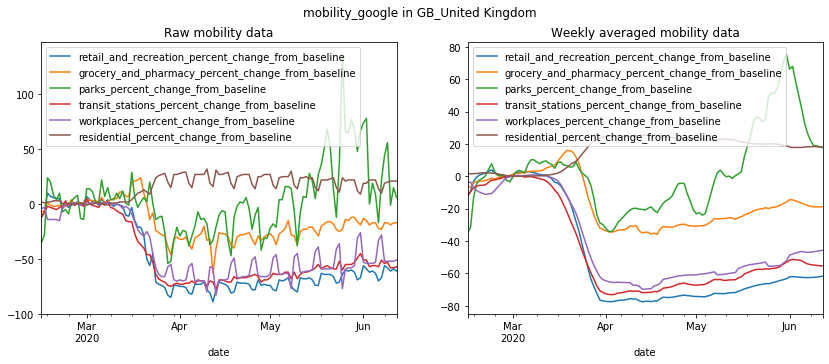

In [7]:
data_source = 'mobility_google'
data_zone = data_sets[data_source].get_country_string('United Kingdom')
bff2.plot_mobility(data_source, data_zone, data_sets)

### Apple

The same interface works for the Apple data

country/region_United Kingdom


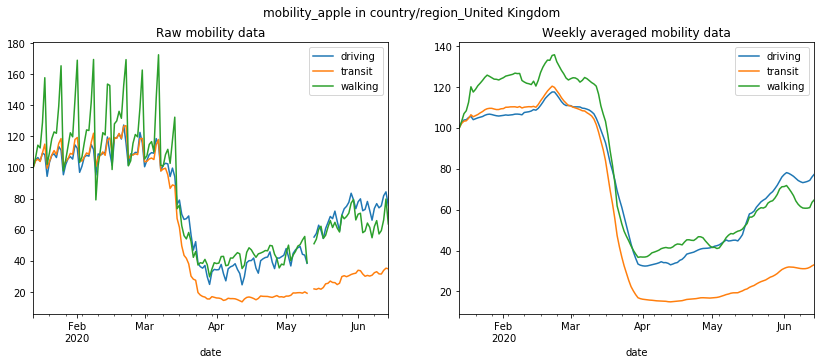

In [8]:
data_source = 'mobility_apple'
data_zone = data_sets[data_source].get_country_string('United Kingdom')
print(data_zone)

bff2.plot_mobility(data_source, data_zone, data_sets)

### Citymapper

Multi zone plotting is also supported

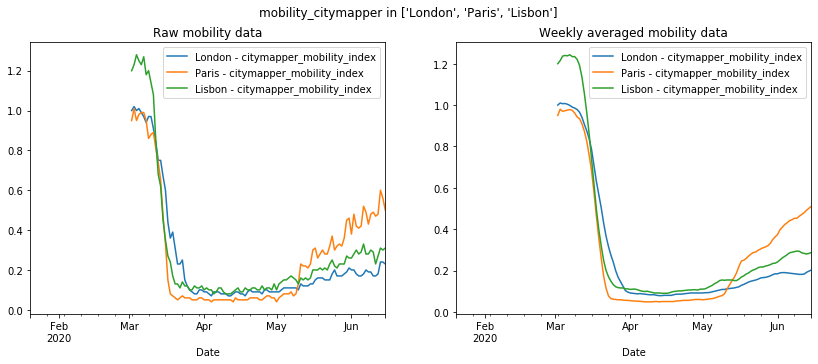

In [9]:
data_source = "mobility_citymapper"
data_zone = ["London", "Paris", "Lisbon"]
bff2.plot_mobility(data_source, data_zone, data_sets)

## Historical GHG emissions

### PIK dataset

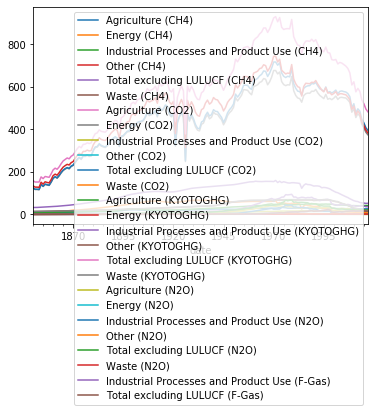

In [10]:
data_source = 'historical_GHG_Sectors_PIK'
data_sets[data_source].get_country_data('United Kingdom').plot()

A better plotting option is available

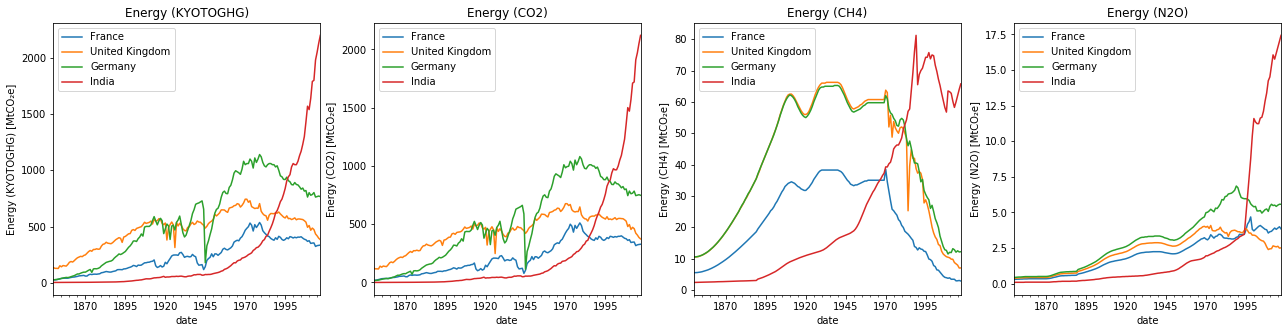

In [11]:
Sectors = [
    "Energy",
]
gases = ["KYOTOGHG", "CO2", "CH4", "N2O"]
countries = ["France", "United Kingdom", "Germany", "India"]
bff2.plot_historical_GHG(data_sets,data_source, countries, gases, Sectors)

This can also be done for all sectors and grouping by ghg

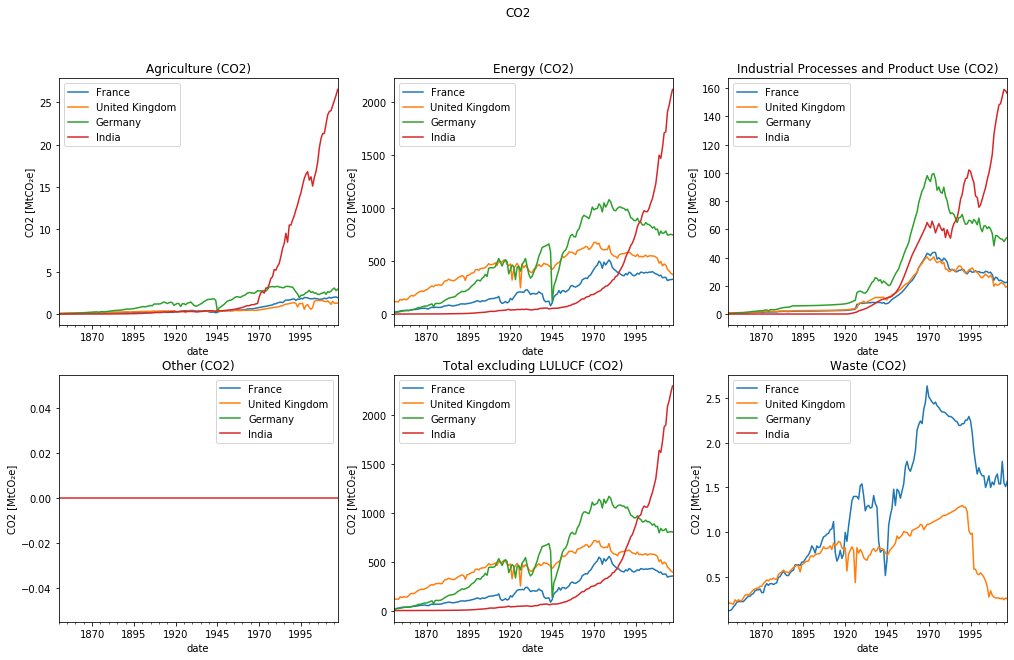

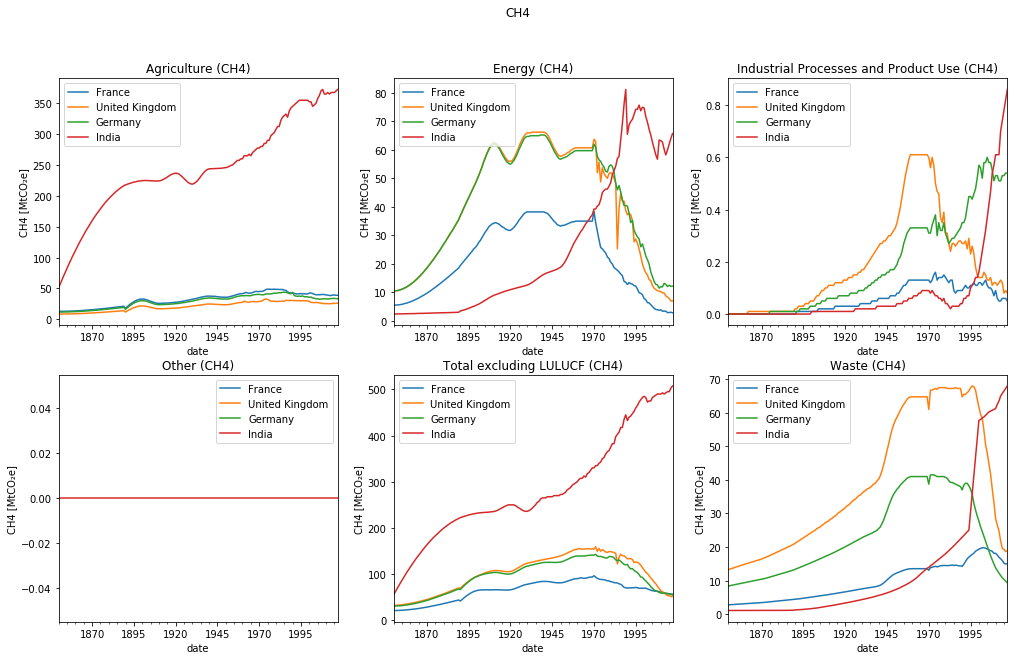

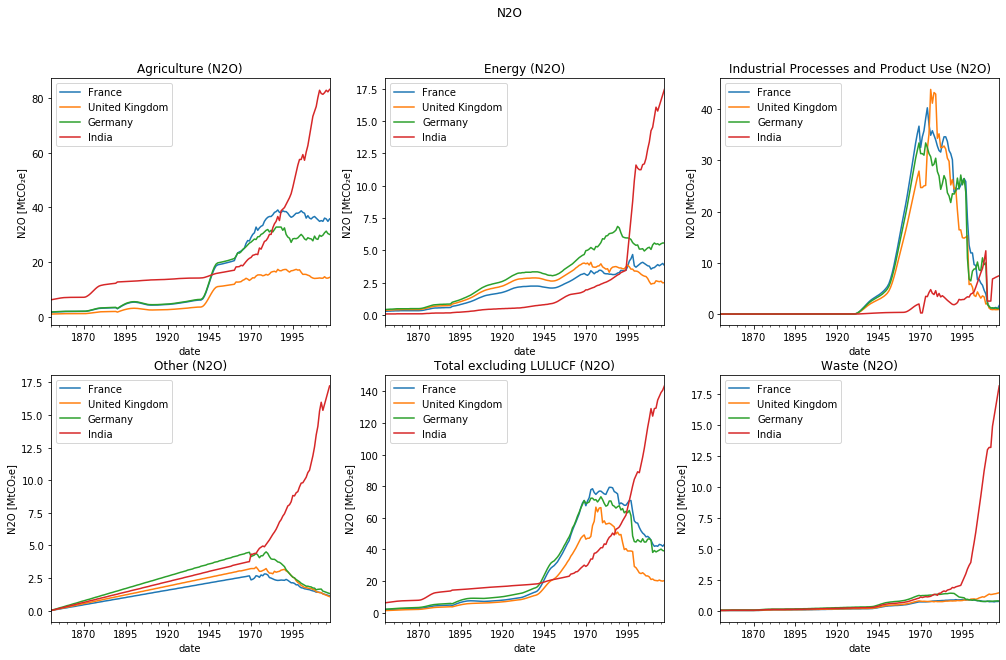

In [12]:
gases = ["CO2", "CH4", "N2O"]
bff2.plot_historical_GHG(data_sets, data_source, countries, gases, group_by='ghg')

### Global carbon project data set

This dataset is completely different as it shows CO2 sources by fuels

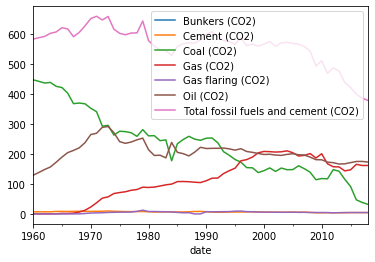

In [13]:
data_source = 'historical_GHG_Sectors_GCP'
data_sets[data_source].get_country_data('United Kingdom').plot()

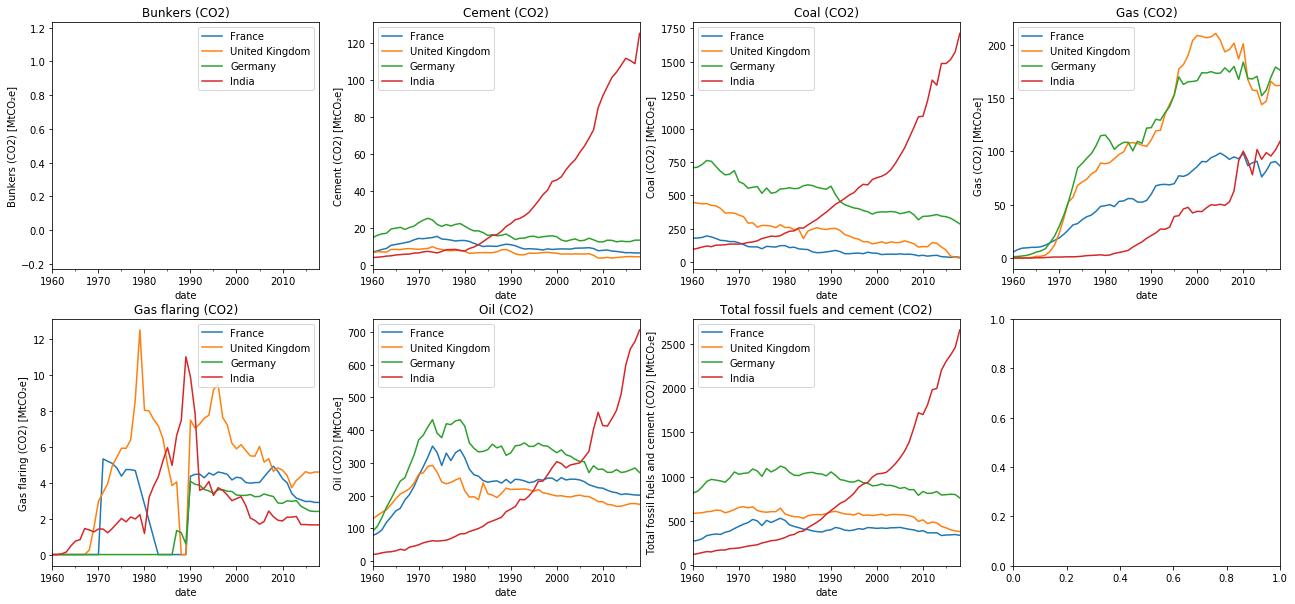

In [14]:
bff2.plot_historical_GHG(data_sets, data_source, countries, ['CO2'])

### UNFCCC

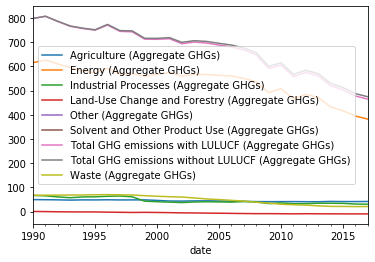

In [15]:
data_source = 'historical_GHG_Sectors_UNFCCC'
data_sets[data_source].get_country_data('United Kingdom').plot()

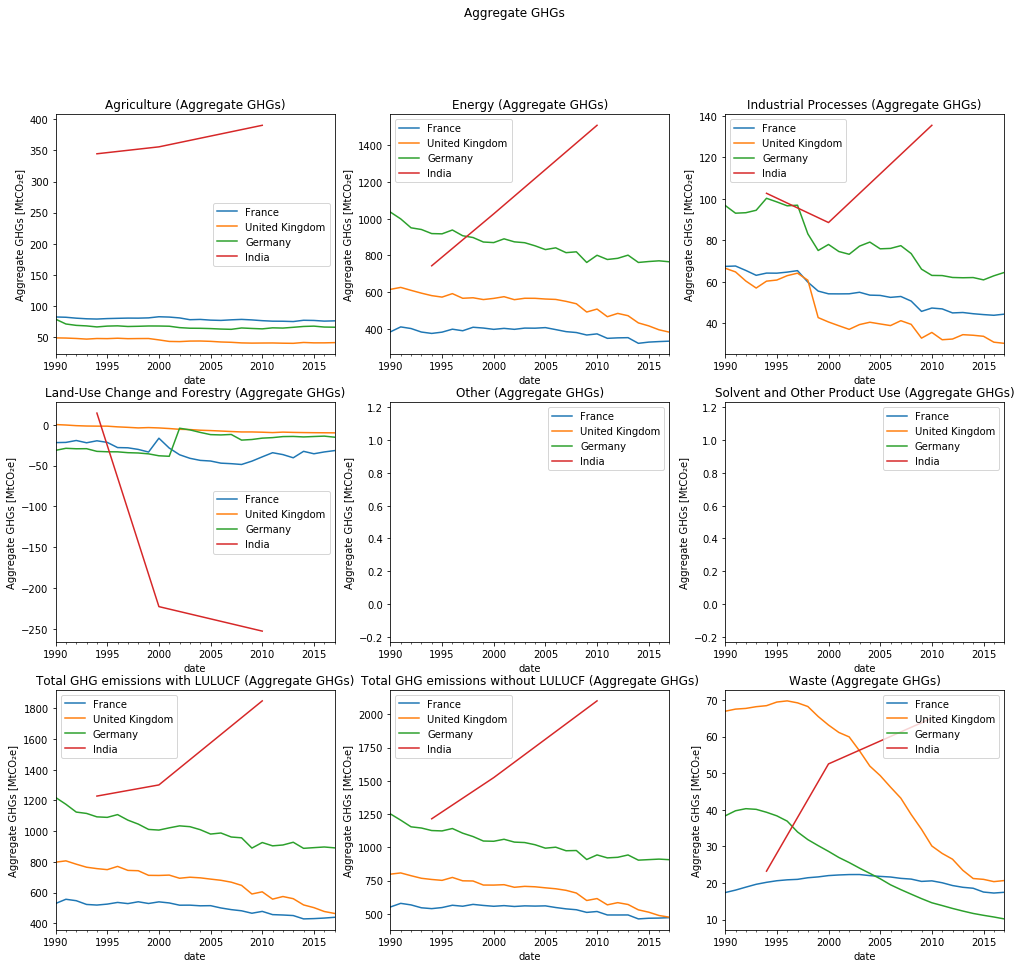

In [16]:
bff2.plot_historical_GHG(data_sets, data_source, countries, ['Aggregate GHGs'], group_by='ghg')

## Energy data for the UK

In [17]:
data_source = 'uk_energy_daily'

Text(0, 0.5, 'Power [MW]')

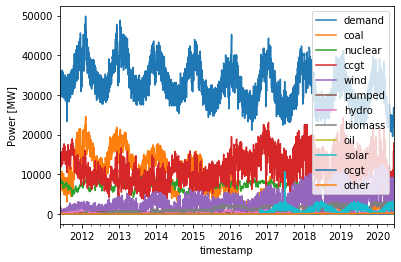

In [18]:
data_sets[data_source].get_country_data('United Kingdom').plot()
plt.ylabel('Power [MW]')

Text(0, 0.5, 'Power [MW]')

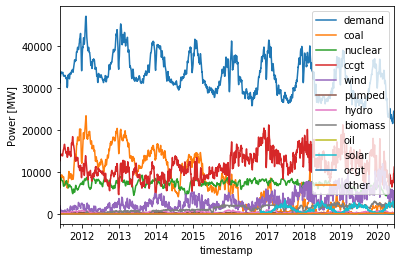

In [19]:
data_sets[data_source].get_country_data('United Kingdom')\
    .rolling('7D').mean()\
    .plot()

plt.ylabel('Power [MW]')

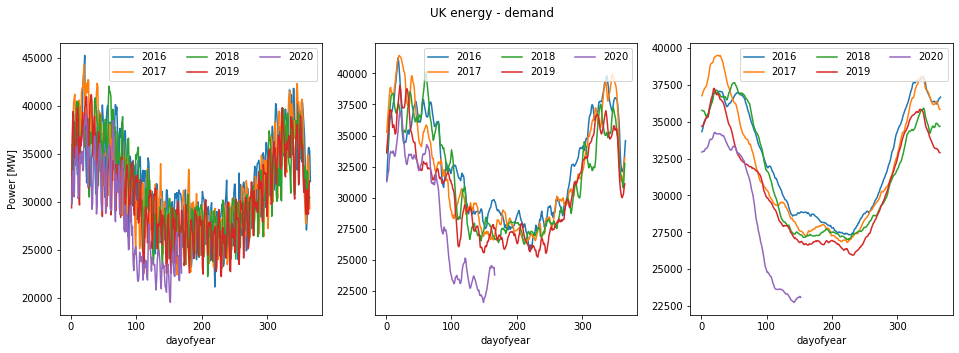

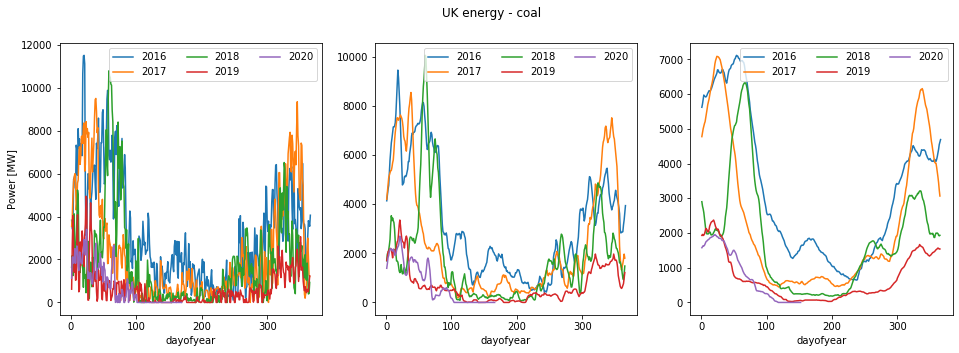

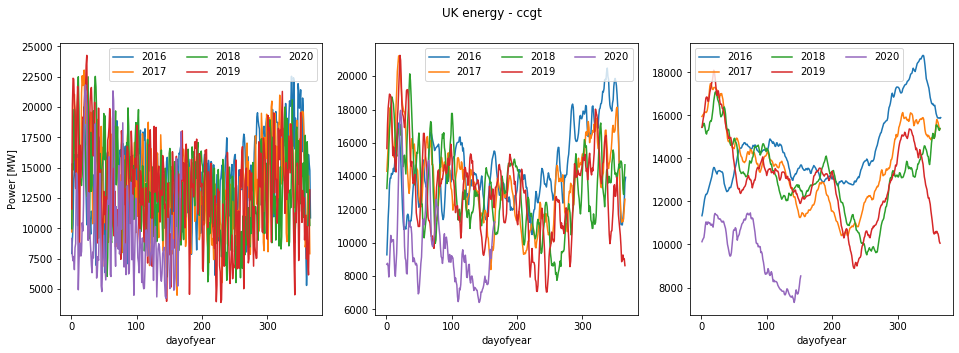

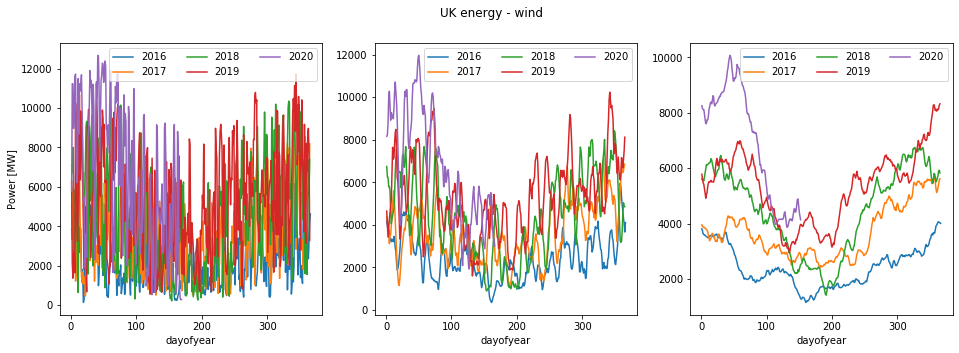

In [21]:
bff2.plot_yearly_data(
    data_sets,
    data_source,
    fields = ["demand", "coal", "ccgt", "wind"],
    norms = [1, 7, 35],
    country = 'United Kingdom',
)